In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from dataloader import DataGenerator
from utils import show_histories
from models import *
from tensorflow.keras.optimizers import Adam
from callbacks import EarlyStoppingReduceLROnPlateau

In [ ]:
seed = 0

In [22]:
tf.keras.utils.set_random_seed(
    seed=seed
)
np.random.default_rng(seed)
tf.config.experimental.enable_op_determinism()

In [23]:
def show_history(histories):
    plt.figure(figsize=(10, 6))

    # Define line colors
    colors = ['blue', 'red', 'green', 'orange']

    # Plot accuracy for each history with different line colors
    for i, (name, history) in enumerate(histories.items()):
        plt.plot(history.history['binary_accuracy'], label=f'{name} train', color=colors[i % len(colors)])

    # Plot validation accuracy for each history with different line colors
    for i, (name, history) in enumerate(histories.items()):
        plt.plot(history.history['val_binary_accuracy'], label=f'{name} validation', linestyle='dashed',
                 color=colors[i % len(colors)])

    plt.title('Models accuracy', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Epoch', fontsize=20)
    plt.legend(loc='center right', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=18)
    plt.show()

    plt.figure(figsize=(10, 6))

    # Plot loss for each history with different line colors
    for i, (name, history) in enumerate(histories.items()):
        plt.plot(history.history['loss'], label=f'{name} train', color=colors[i % len(colors)])

    # Plot validation loss for each history with different line colors
    for i, (name, history) in enumerate(histories.items()):
        plt.plot(history.history['val_loss'], label=f'{name} validation', linestyle='dashed',
                 color=colors[i % len(colors)])

    plt.title('Models loss', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.xlabel('Epoch', fontsize=20)
    plt.legend(loc='center right', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=18)
    plt.show()

In [24]:
params = {
    'batch_size': 1,
    'shape': (128, 128, 128),
    'n_channels': 1,
    'shuffle': True
}

train_path = "data/train/"
val_path = "data/validation/"
save_path = 'models/'

train_generator = DataGenerator(path=train_path, ids=range(200), **params)
valid_generator = DataGenerator(path=val_path, ids=range(20), **params)

In [25]:
callbacks = EarlyStoppingReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, min_delta=1e-4,
                                         restore_best_weights=True, early_stopping=True, verbose=1)

In [26]:
models = [se_unet, inception_unet, bistream_unet, bistream_se_unet]
histories = {}

In [27]:
for model in models:
    # Compile the model with the current learning rate
    model = model(seed=0)
    print(f'=============Training {model.name} model===============')
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='bce',
                  metrics=['binary_accuracy'])
    # Fit the model
    history = model.fit(train_generator, validation_data=valid_generator,
                        epochs=100,
                        callbacks=[callbacks], verbose=1)
    print(f"Model performance: {model.evaluate(valid_generator, verbose=0)}")
    
    model.save_weights(save_path + model.name + '.h5')
    print(f'Saved {model.name} model weights')
    histories[model.name] = history

=============Training SE_U-Net model===============
Epoch 1/100
200/200 [==============================] - 118s 580ms/step - loss: 0.2670 - binary_accuracy: 0.9289 - val_loss: 0.2217 - val_binary_accuracy: 0.9277 - lr: 0.0010
Epoch 2/100
200/200 [==============================] - 115s 573ms/step - loss: 0.1843 - binary_accuracy: 0.9336 - val_loss: 0.1662 - val_binary_accuracy: 0.9401 - lr: 0.0010
Epoch 3/100
200/200 [==============================] - 115s 576ms/step - loss: 0.1501 - binary_accuracy: 0.9445 - val_loss: 0.1341 - val_binary_accuracy: 0.9494 - lr: 0.0010
Epoch 4/100
200/200 [==============================] - 116s 578ms/step - loss: 0.1265 - binary_accuracy: 0.9528 - val_loss: 0.1107 - val_binary_accuracy: 0.9570 - lr: 0.0010
Epoch 5/100
200/200 [==============================] - 114s 571ms/step - loss: 0.1097 - binary_accuracy: 0.9589 - val_loss: 0.1028 - val_binary_accuracy: 0.9594 - lr: 0.0010
Epoch 6/100
200/200 [==============================] - 115s 576ms/step - loss:

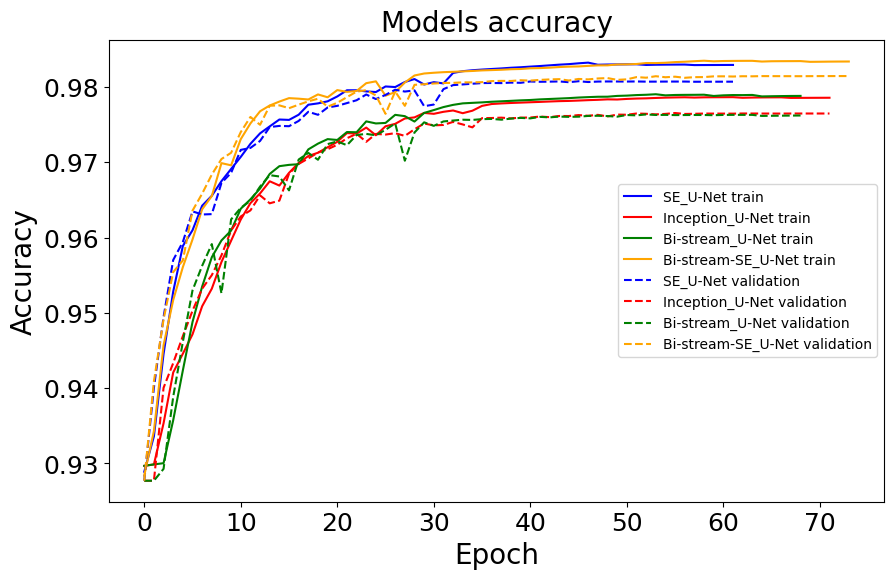

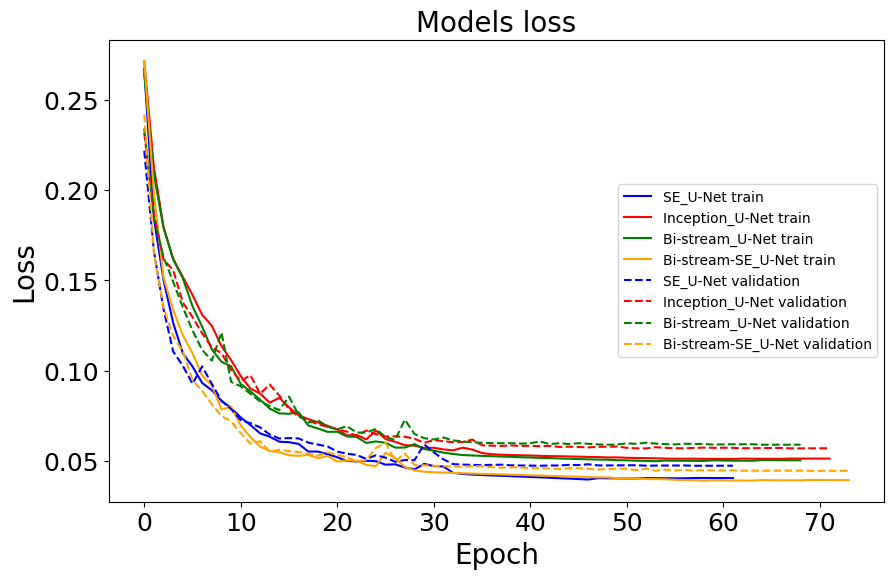

In [31]:
show_histories(histories, save_path='results/')